In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
data_breast_cancer = datasets.load_breast_cancer()
data_breast_cancer = pd.DataFrame(
    {
        'symmetry': data_breast_cancer["data"][:, (8)],
        'texture': data_breast_cancer["data"][:, (1)],
        'target': data_breast_cancer["target"]
    }
    ,columns=['symmetry','texture','target'])
data_breast_cancer

with open('proj2_data.csv', 'r') as f:
    text = f.read()
counts = {'|': text.count('|'), ';': text.count(';'), ',': text.count(',')}
separator = max(counts, key=counts.get)
deci = "." if separator == "," else ","
df = pd.read_csv("proj2_data.csv", sep=separator, decimal=deci).round(2)
print(df)
df.to_pickle('proj2_ex01.pkl')

,symmetry,texture,target
0,0.2419,10.38,0
1,0.1812,17.77,0
2,0.2069,21.25,0
3,0.2597,20.38,0
4,0.1809,14.34,0
...,...,...,...
564,0.1726,22.39,0
565,0.1752,28.25,0
566,0.1590,28.08,0
567,0.2397,29.33,0


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
cancer_X_training, cancer_X_test, cancer_y_training, cancer_y_test = train_test_split(data_breast_cancer[['symmetry','texture']],data_breast_cancer[['target']],test_size=0.2)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
tree_clf = DecisionTreeClassifier(max_depth=4,random_state=42)
tree_clf.fit(cancer_X_training, cancer_y_training)
cancer_pred_train = tree_clf.predict(cancer_X_training)
f1_cancer_train = f1_score(cancer_y_training, cancer_pred_train)
acc_cancer_train = accuracy_score(cancer_y_training,cancer_pred_train)
print(f1_cancer_train, acc_cancer_train)

0.8422712933753944 0.7802197802197802


In [5]:
cancer_pred_test = tree_clf.predict(cancer_X_test)
f1_cancer_test = f1_score(cancer_y_test, cancer_pred_test)
acc_cancer_test = accuracy_score(cancer_y_test,cancer_pred_test)
print(f1_cancer_test, acc_cancer_test)

0.8211920529801325 0.7631578947368421


In [6]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.export_graphviz(tree_clf, out_file='bc.png')

In [7]:
# Saving
import pickle
ll = list()
ll.append(4)
ll.append(f1_cancer_train)
ll.append(f1_cancer_test)
ll.append(acc_cancer_train)
ll.append(acc_cancer_test)

with open('f1acc_tree.pkl ', 'wb') as handle:
    pickle.dump(ll, handle)

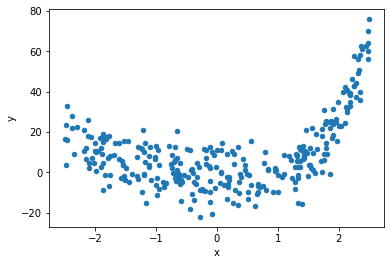

In [8]:
size = 300
X = np.random.rand(size)*5-2.5
w4, w3, w2, w1, w0 = 1, 2, 1, -4, 2
y = w4*(X**4) + w3*(X**3) + w2*(X**2) + w1*X + w0 + np.random.randn(size)*8-4
df = pd.DataFrame({'x': X, 'y': y})
df.plot.scatter(x='x',y='y')
df = df.sort_values('x')

In [9]:
random_X_training, random_X_test, random_y_training, random_y_test = train_test_split(df['x'].to_numpy().reshape(-1, 1), df['y'].to_numpy().reshape(-1, 1), test_size=0.2)

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg.fit(random_X_training, random_y_training)
random_pred_training = tree_reg.predict(random_X_training)
random_mse_training = mean_squared_error(random_y_training, random_pred_training)
print(random_mse_training)

66.3455751075309


In [11]:
random_pred_test = tree_reg.predict(random_X_test)
random_mse_test = mean_squared_error(random_y_test, random_pred_test)
print(random_mse_test)

85.54005031557274


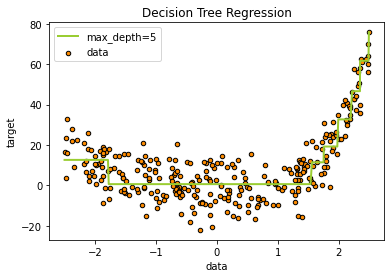

In [12]:
yy = tree_reg.predict(df['x'].to_numpy().reshape(-1, 1))

plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(df['x'].to_numpy().reshape(-1, 1), yy, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [13]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.export_graphviz(tree_reg, out_file='reg.png')

In [14]:
# Saving
ll = list()
ll.append(3)
ll.append(random_mse_training)
ll.append(random_mse_test)

with open('mse_tree.pkl', 'wb') as handle:
    pickle.dump(ll, handle)